# Netflix Recommendation Project - Pre Processing

## Introduction

In [194]:
import pandas as pd

In [195]:
df = pd.read_csv('/Users/burak/Developer/MachineLearning/4462 - Final Project/dataset/netflix_titles.csv')

In [196]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [197]:
df.sample(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5076,s5077,Movie,Arango y Sanint: Ríase el show,"Raúl Campos, Jan Suter","Julián Arango, Antonio Sanint",Colombia,"January 17, 2018",2018,TV-MA,62 min,Stand-Up Comedy,Colombian stand-up comedians Antonio Sanint an...
5613,s5614,Movie,"Michael Bolton's Big, Sexy Valentine's Day Spe...","Scott Aukerman, Akiva Schaffer","Michael Bolton, Andy Samberg, Will Forte, Kenn...",United States,"February 7, 2017",2017,TV-MA,54 min,"Comedies, Music & Musicals, Romantic Movies","After Santa tells him he needs 75,000 new babi..."
7149,s7150,Movie,Jumping the Broom,Salim Akil,"Angela Bassett, Paula Patton, Laz Alonso, Lore...",United States,"November 1, 2020",2011,PG-13,113 min,"Comedies, Romantic Movies","After a whirlwind romance, a couple rushes to ..."


In [198]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [199]:
df.shape

(8807, 12)

In [200]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [201]:
df.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [202]:
# Describe rating
df['rating'].describe()

count      8803
unique       17
top       TV-MA
freq       3207
Name: rating, dtype: object

## Visualization

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='release_year'>

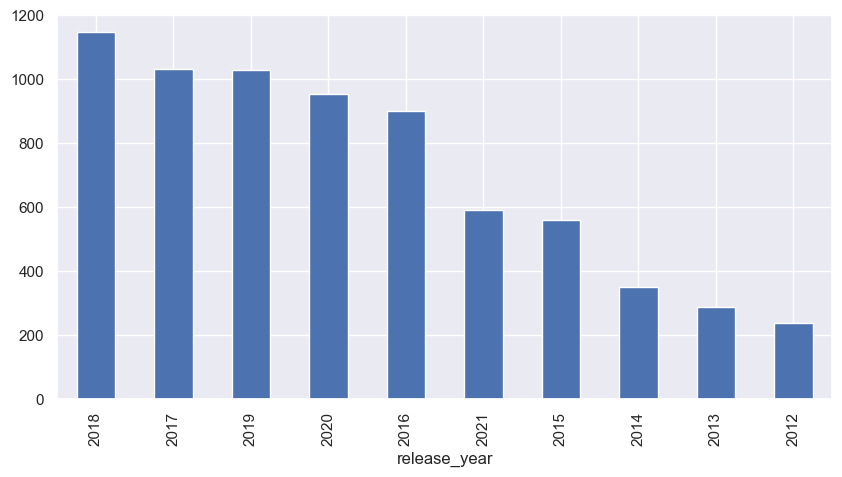

In [204]:
# visualize 10 shows title for each year
df.groupby('release_year')['title'].count().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10, 5))

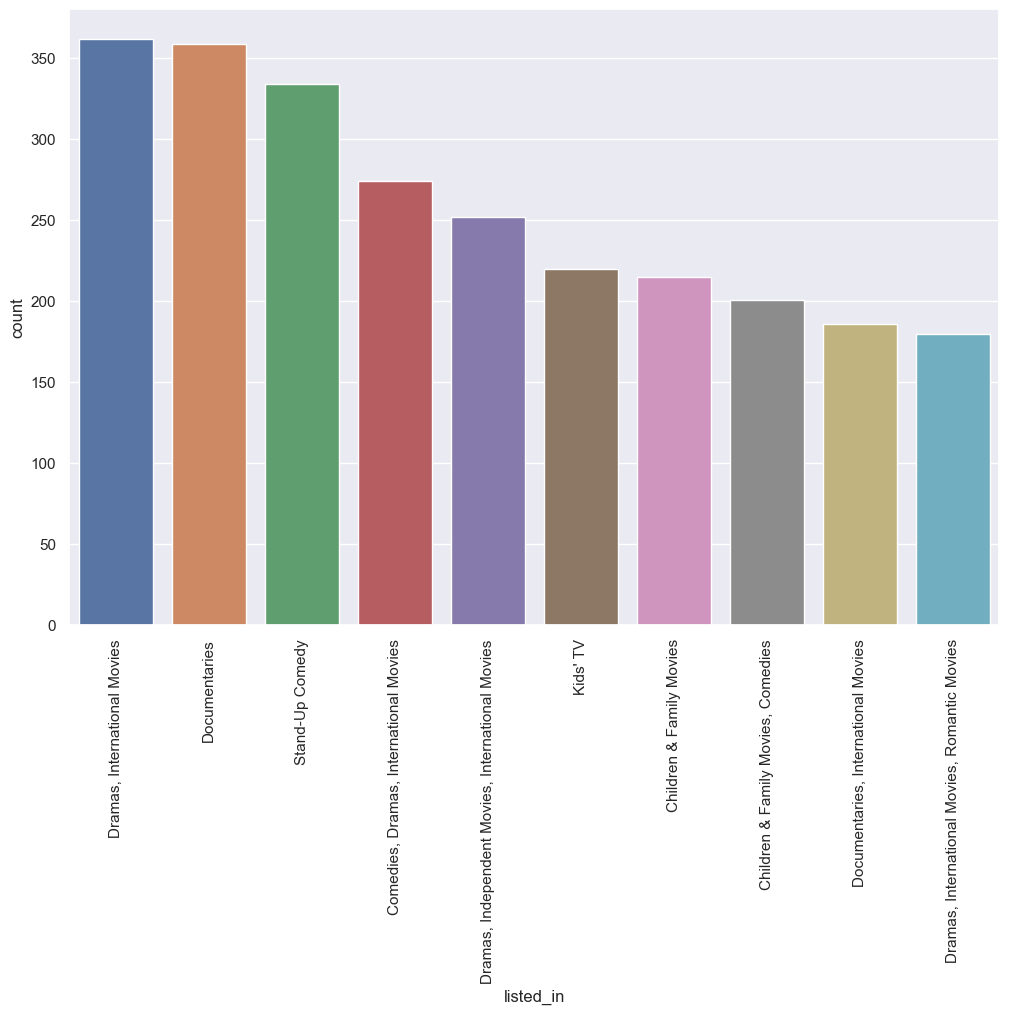

In [205]:
# visualize 10 shows for each genre
plt.figure(figsize=(12, 8))
sns.countplot(x='listed_in', data=df, order=df['listed_in'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

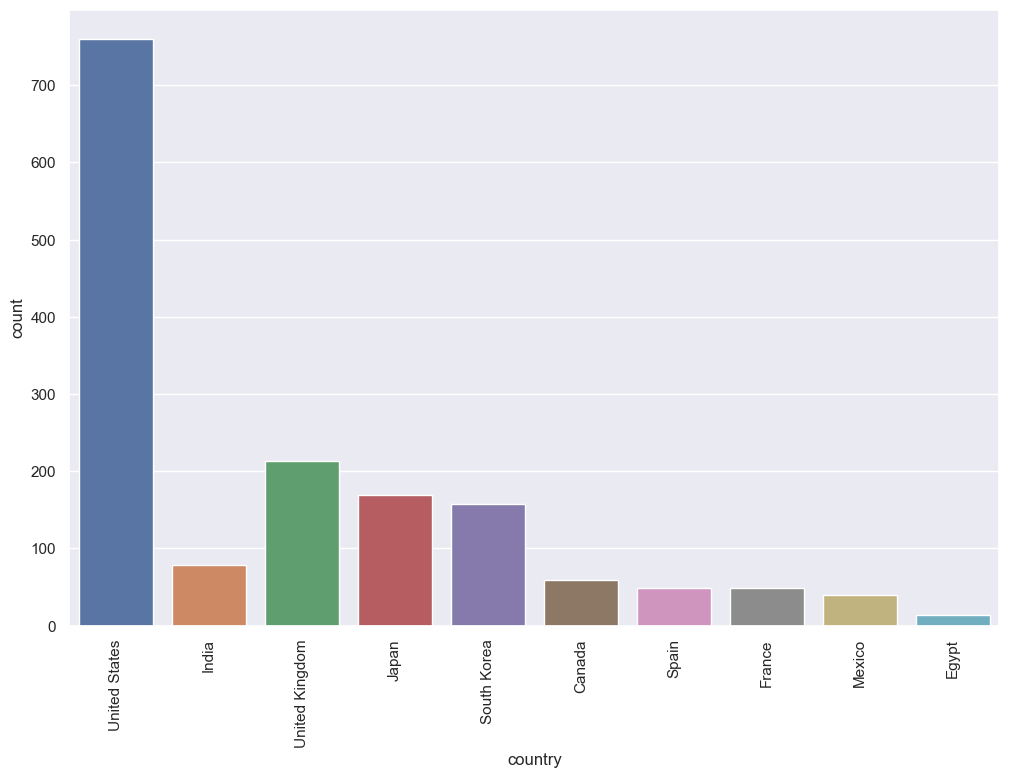

In [206]:
# Visualize Distribution of shows by country
df_shows = df[df['type'] == 'TV Show']

plt.figure(figsize=(12, 8))
sns.countplot(x='country', data=df_shows, order=df['country'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

In [207]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [208]:
#print type of all columns
for col in df.columns:
    print(col, type(df[col][0]))

show_id <class 'str'>
type <class 'str'>
title <class 'str'>
director <class 'str'>
cast <class 'float'>
country <class 'str'>
date_added <class 'str'>
release_year <class 'numpy.int64'>
rating <class 'str'>
duration <class 'str'>
listed_in <class 'str'>
description <class 'str'>


In [209]:
# find null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [210]:
# fill null values with 'Unknown' in director
df['director'] = df['director'].fillna('')

# fill null values with 'Unknown' in cast
df['cast'] = df['cast'].fillna('')

# fill null values with 'Unknown' in country
df['country'] = df['country'].fillna('')

# fill null values with 'Unknown' in date_added
df['date_added'] = df['date_added'].fillna('')

# fill null values with '' in rating
df['rating'] = df['rating'].fillna('')

# fill null values with '' in duration
df['duration'] = df['duration'].fillna('')

In [211]:
#drop row if Listed_in include "LGBTQ Movies"
df = df.drop(df[df['listed_in'] == 'LGBTQ Movies'].index)

In [212]:
df_genres = df['listed_in']

#encode games by using one hot encoding
df_genres_encoded = df_genres.str.get_dummies(sep=',')
# remove if there is a [ or ] in the game name
df_genres_encoded = df_genres_encoded.rename(columns=lambda x: x.replace('[', '').replace(']', ''))
df_genres_encoded

,Anime Features,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,Documentaries,Docuseries,Dramas,...,Sports Movies,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Sci-Fi & Fantasy,TV Shows,Thrillers
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8804,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8805,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [213]:
df_casts = df['cast']

#encode games by using one hot encoding
df_casts_encoded = df_casts.str.get_dummies(sep=',')
# remove if there is a [ or ] in the game name
df_casts_encoded = df_casts_encoded.rename(columns=lambda x: x.replace('[', '').replace(']', ''))
df_casts_encoded

,Jr.,"""Riley"" Lakdhar Dridi",'Najite Dede,2 Chainz,2Mex,50 Cent,9m88,A Boogie Wit tha Hoodie,A. Murat Özgen,A.C. Peterson,...,Çağatay Ulusoy,Çağlar Çorumlu,Çetin Tekindor,Öykü Karayel,Úrsula Corberó,İbrahim Büyükak,İbrahim Çelikkol,Şahin Irmak,Şükrü Özyıldız,Ṣọpẹ́ Dìrísù
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8804,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [214]:
# combine df_games_encoded and df_keywords_encoded to df
df = df.drop(['listed_in', 'cast'], axis=1)
print(df.shape)
df = df.join(df_genres_encoded)
print(df.shape)
df = df.join(df_casts_encoded)
#print(df.shape)

(8807, 10)
(8807, 83)


In [215]:
# convert from categorical data to numerical data if the colıumns is string
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_test = df.copy()

df_test['type'] = le.fit_transform(df['type'])
df_test['title'] = le.fit_transform(df['title'])
df_test['director'] = le.fit_transform(df['director'])
df_test['country'] = le.fit_transform(df['country'])
df_test['date_added'] = le.fit_transform(df['date_added'])
df_test['release_year'] = le.fit_transform(df['release_year'])
df_test['rating'] = le.fit_transform(df['rating'])
df_test['duration'] = le.fit_transform(df['duration'])
df_test['description'] = le.fit_transform(df['description'])

In [216]:
#drop id
df = df.drop('show_id', axis=1)

# prepare data for model
df['type'] = df['type'].map({'TV Show': 0, 'Movie': 1})


In [217]:
# prepare data for model
df['type'] = df['type'].map({'TV Show': 0, 'Movie': 1})

In [222]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [236]:
descriptions = df['description'].tolist()

In [237]:
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the descriptions
vectorizer.fit(descriptions)

# Transform the descriptions to numerical vectors
numerical_vectors = vectorizer.transform(descriptions)

# Convert numerical vectors to a DataFrame
numerical_df = pd.DataFrame(numerical_vectors.toarray())

# Concatenate the original DataFrame with the numerical vectors DataFrame
df_with_numerical = pd.concat([df, numerical_df], axis=1)

df.columns

Index(['type', 'title', 'director', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'description', ' Anime Features',
       ...
       'Çağatay Ulusoy', 'Çağlar Çorumlu', 'Çetin Tekindor', 'Öykü Karayel',
       'Úrsula Corberó', 'İbrahim Büyükak', 'İbrahim Çelikkol', 'Şahin Irmak',
       'Şükrü Özyıldız', 'Ṣọpẹ́ Dìrísù'],
      dtype='object', length=39378)

In [ ]:
# convert df to csv
df.to_csv('/Users/burak/Developer/MachineLearning/4462 - Final Project/dataset/netflix_preprocessed.csv', index=False)